In [72]:
#titanic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_roc_curve,auc,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/saihaneesh26/ML_lab/main/datasets/titanic.csv")
df 

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [17]:
df = df.dropna()
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [18]:
df = df.drop(['Name'],axis=1)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [19]:
encoder = LabelEncoder()
scaler = StandardScaler()
df['Sex'] = encoder.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000
883,1,1,0,19.0,0,0,30.0000
884,0,3,0,7.0,1,2,23.4500
885,1,1,1,26.0,0,0,30.0000


In [20]:
df[['Fare','Age']] = scaler.fit_transform(df[['Fare','Age']])
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,-0.529366,1,0,-0.503586
1,1,1,0,0.604265,1,0,0.783412
2,1,3,0,-0.245958,0,0,-0.490020
3,1,1,0,0.391709,1,0,0.417948
4,0,3,1,0.391709,0,0,-0.487507
...,...,...,...,...,...,...,...
882,0,2,1,-0.175106,0,0,-0.388018
883,1,1,0,-0.741922,0,0,-0.046336
884,0,3,0,-1.592145,1,2,-0.177984
885,1,1,1,-0.245958,0,0,-0.046336


In [21]:
x = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size = 0.2,shuffle=True,random_state=2)
print(len(x_train),len(x_test))

709 178


In [22]:
model = GaussianNB()
model.fit(x_train,y_train)
preds = model.predict(x_test)
probs = model.predict_proba(x_test)
prob = probs[:,1]

In [25]:
cm = confusion_matrix(y_test,preds)
print("CM:",cm)

CM: [[90 19]
 [23 46]]


In [27]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]
total = TP+TN+FP+FN

In [28]:
print("acc",(TP+TN)/total)

acc 0.7640449438202247


In [30]:
fpr,tpr,_ = roc_curve(y_test,prob) 
print("AUC",auc(fpr,tpr))

AUC 0.7775561760404202


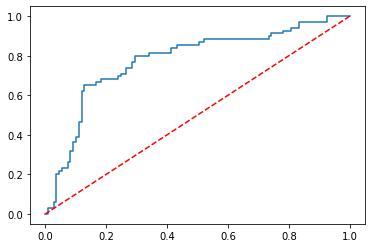

In [34]:
#ROC
plt.plot(fpr,tpr)
plt.plot([1,0],[1,0],'r--')

In [61]:
#multinomial
ndf = pd.read_csv("https://raw.githubusercontent.com/saihaneesh26/ML_lab/main/datasets/iris.csv")
ndf

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [62]:
encoder1 = LabelEncoder()
scaler1 = MinMaxScaler() # dont use standard scaler coz it produces neg values .. and not accepted in multinomialNB
X = scaler1.fit_transform(ndf.iloc[:,:4])
Y = encoder1.fit_transform(ndf.iloc[:,-1])

In [63]:
X[0]

array([0.22222222, 0.625     , 0.06779661, 0.04166667])

In [64]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size=0.2,shuffle=True,random_state=2)

In [78]:
model = MultinomialNB()
model.fit(x_train,y_train)
preds = model.predict(x_test)
probs = model.predict_proba(x_test)
prob0 = probs[:,0]
prob1 = probs[:,1]
prob2 = probs[:,2]

In [84]:
cm = confusion_matrix(y_test,preds)
cm

array([[10,  0,  0],
       [ 0,  7,  3],
       [ 0,  2,  8]])

In [105]:
prob0

array([0.41156874, 0.1016337 , 0.12608034, 0.41497537, 0.16955769,
       0.08044428, 0.11015568, 0.0975953 , 0.49609642, 0.52362856,
       0.17911203, 0.18412458, 0.17115943, 0.12909193, 0.47125241,
       0.11794932, 0.20106125, 0.46250376, 0.11000546, 0.46839347,
       0.14945727, 0.12404834, 0.42640923, 0.1952377 , 0.1717442 ,
       0.11205148, 0.09414378, 0.48001567, 0.17733989, 0.57082276])

In [116]:
#using one vs rest for label 0
prob = prob0
prob

array([0.41156874, 0.1016337 , 0.12608034, 0.41497537, 0.16955769,
       0.08044428, 0.11015568, 0.0975953 , 0.49609642, 0.52362856,
       0.17911203, 0.18412458, 0.17115943, 0.12909193, 0.47125241,
       0.11794932, 0.20106125, 0.46250376, 0.11000546, 0.46839347,
       0.14945727, 0.12404834, 0.42640923, 0.1952377 , 0.1717442 ,
       0.11205148, 0.09414378, 0.48001567, 0.17733989, 0.57082276])

In [117]:
y_test

array([0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1,
       0, 1, 1, 2, 2, 0, 1, 0])

In [121]:
y_true = []
#class taken for prob should be 1
for i in y_test:
  if i==0:
    y_true.append(1)
  else:
    y_true.append(0)


In [122]:
fpr,tpr,_ = roc_curve(y_true,prob)

In [123]:
print("AUC",auc(fpr,tpr)) #params must be sent crctly

AUC 1.0


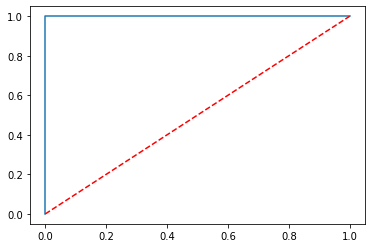

In [128]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')

In [124]:
# as class 1 is totally distinguished its auc is 1
# but for others it wouldnt be 1
# now take class0,1 as 0 and 2 as 1
new_prob = prob2 
y_true_new = []
for i in y_test:
  if(i==2):
    y_true_new.append(1)
  else:
    y_true_new.append(0)
y_true_new

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0]

In [125]:
fpr2,tpr2,_ = roc_curve(y_true_new,new_prob)
print("AUC",auc(fpr2,tpr2))

AUC 0.985


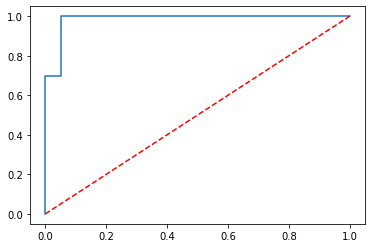

In [129]:
plt.plot(fpr2,tpr2)
plt.plot([0,1],[0,1],'r--')